In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
os.chdir('Data/dogs-vs-cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for c in random.sample(glob.glob('cat*'), 500):
        shutil.move(c, 'train/cat')
    for c in random.sample(glob.glob('dog*'), 500):
        shutil.move(c, 'train/dog')
    for c in random.sample(glob.glob('cat*'), 100):
        shutil.move(c, 'valid/cat')
    for c in random.sample(glob.glob('dog*'), 100):
        shutil.move(c, 'valid/dog')
    for c in random.sample(glob.glob('cat*'), 50):
        shutil.move(c, 'test/cat')
    for c in random.sample(glob.glob('dog*'), 50):
        shutil.move(c, 'test/dog')
               
os.chdir('../../')

In [3]:
train_path = 'data/dogs-vs-cats/train'
valid_path = 'data/dogs-vs-cats/valid'
test_path = 'data/dogs-vs-cats/test'

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224, 224), classes=['cat','dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224, 224), classes=['cat','dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [5]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100

In [6]:
imgs, labels = next(train_batches)

In [7]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

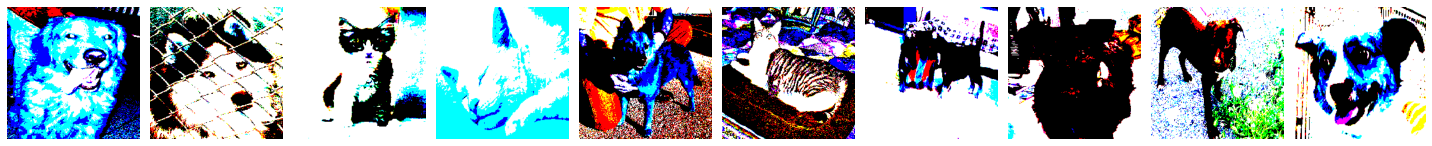

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [8]:
plotImages(imgs)
print(labels)

In [9]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Train for 100 steps, validate for 20 steps
Epoch 1/10
100/100 - 51s - loss: 24.3324 - accuracy: 0.5450 - val_loss: 9.2990 - val_accuracy: 0.5500
Epoch 2/10
100/100 - 44s - loss: 2.8068 - accuracy: 0.7300 - val_loss: 3.8946 - val_accuracy: 0.5850
Epoch 3/10
100/100 - 47s - loss: 0.5635 - accuracy: 0.8890 - val_loss: 3.5016 - val_accuracy: 0.6100
Epoch 4/10
100/100 - 47s - loss: 0.3329 - accuracy: 0.9370 - val_loss: 3.1128 - val_accuracy: 0.6350
Epoch 5/10
100/100 - 47s - loss: 0.1144 - accuracy: 0.9710 - val_loss: 2.9476 - val_accuracy: 0.6300
Epoch 6/10
100/100 - 52s - loss: 0.1825 - accuracy: 0.9500 - val_loss: 2.8368 - val_accuracy: 0.5950
Epoch 7/10
100/100 - 52s - loss: 0.0060 - accuracy: 0.9990 - val_loss: 2.8969 - val_accuracy: 0.6600
Epoch 8/10
100/100 - 52s - loss: 0.0056 - accuracy: 0.9980 - val_loss: 2.7857 - val_accuracy: 0.6450
Epoch 9/10
100/100 - 54s - loss: 5.8661e-04 - accuracy: 1.0000 - val_loss: 2.7779 - val_accuracy: 0.6500
Epoch 10/10
100/100 - 53s - loss: 2.2577e-0

In [13]:
test_imgs, test_labels = next(test_batches)
# plots(test_imgs, titles=test_labels)

In [14]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [15]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [16]:
import numpy as np
np.round(predictions)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [17]:
preds = np.round(predictions[:,0])
preds

array([0., 1., 0., 1., 1., 0., 1., 0., 1., 1.], dtype=float32)

In [18]:
cm = confusion_matrix(test_labels, preds)
# cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 0]
 [4 6]]


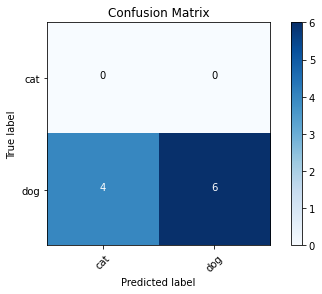

In [20]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [21]:
vgg16_model = keras.applications.vgg16.VGG16()

In [22]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [23]:
type(vgg16_model)

tensorflow.python.keras.engine.training.Model

In [24]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [26]:
for layer in model.layers:
    layer.trainable = False

In [27]:
model.add(Dense(2, activation = 'softmax'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [29]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.fit_generator(train_batches, steps_per_epoch=4, validation_data=valid_batches, validation_steps=4, epochs=20, verbose=2)

Epoch 1/20
4/4 - 56s - loss: 0.6979 - accuracy: 0.6500 - val_loss: 0.6907 - val_accuracy: 0.7750
Epoch 2/20
4/4 - 55s - loss: 0.5695 - accuracy: 0.7500 - val_loss: 0.5916 - val_accuracy: 0.8750
Epoch 3/20
4/4 - 53s - loss: 0.4457 - accuracy: 0.8000 - val_loss: 0.5109 - val_accuracy: 0.8750
Epoch 4/20
4/4 - 60s - loss: 0.2125 - accuracy: 0.9000 - val_loss: 0.4529 - val_accuracy: 0.8750
Epoch 5/20
4/4 - 54s - loss: 0.2789 - accuracy: 0.8500 - val_loss: 0.4090 - val_accuracy: 0.8750
Epoch 6/20
4/4 - 55s - loss: 0.3790 - accuracy: 0.7750 - val_loss: 0.3675 - val_accuracy: 0.9250
Epoch 7/20
4/4 - 55s - loss: 0.4462 - accuracy: 0.9000 - val_loss: 0.3314 - val_accuracy: 0.9250
Epoch 8/20
4/4 - 54s - loss: 0.2226 - accuracy: 0.9000 - val_loss: 0.3045 - val_accuracy: 0.9250
Epoch 9/20
4/4 - 53s - loss: 0.2099 - accuracy: 0.9250 - val_loss: 0.2834 - val_accuracy: 0.9250
Epoch 10/20
4/4 - 53s - loss: 0.3856 - accuracy: 0.8500 - val_loss: 0.2622 - val_accuracy: 0.9250
Epoch 11/20
4/4 - 55s - loss:

In [31]:
test_imgs, test_labels = next(test_batches)

In [32]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [33]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [34]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion matrix, without normalization
[[10]]


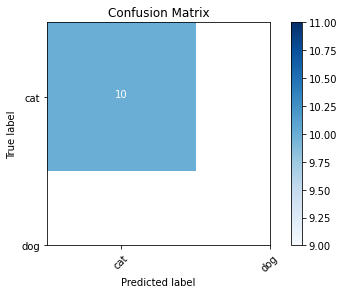

In [35]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')